<a href="https://colab.research.google.com/github/MichelaMarini/MATH-6373-PyTorch-tutorial/blob/main/WEEK_1_INTRO_TO_TENSORS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
print(torch.__version__)

2.5.1+cu121


# Creating tensors using existing data

In [ ]:
data = np.array([0,1,2])
print(data, data.dtype) #check the data type

[0 1 2] int64


In [ ]:
data_T = torch.Tensor(data)
print(data_T, data_T.dtype) #it may not preserve the original data type or shape in some cases

tensor([0., 1., 2.]) torch.float32


In [ ]:
data_t = torch.tensor(data)
print(data_t, data_t.dtype) # it ensures that the resulting tensor has the same data type and shape as the input data

tensor([0, 1, 2]) torch.int64


**torch.tensor** the created tensor does not share memory with the original NumPy array. It creates a copy of the data.

**torch.from_numpy** It creates a tensor that shares the same underlying memory with the NumPy array. It is more memory-efficient as it avoids copying the data.

In summary, the main difference is in memory sharing:

*   Use *torch.tensor* when you want a new tensor with a copy of the data.
*   Use *torch.from_numpy* when you want a tensor that shares the same memory with the NumPy array to save memory and computational cost.


In [ ]:
data_tensor = torch.from_numpy(data) # specifically designed for NumPy arrays
print(data_tensor, data_tensor.dtype)

tensor([0, 1, 2]) torch.int64


In [ ]:
data_tensor_1 = torch.as_tensor(data) #it always avoids creating copy and it can take in any tensor data
print(data_tensor_1, data_tensor_1.dtype)

tensor([0, 1, 2]) torch.int64


Example of converting dataframe into tensor

In [ ]:
import pandas as pd

# Create data for the DataFrame
data = {
    'Person': ['Alice', 'Bob', 'Charlie'],
    'The Burger Joint': np.random.randint(0, 6, size=3),
    'Whataburger': np.random.randint(0, 6, size=3),
    "McDonald's": np.random.randint(0, 6, size=3)
}

# Create the DataFrame
df = pd.DataFrame(data)

# Extract the numerical values from the DataFrame
tensor_data = df.iloc[:, 1:].values

# Convert the NumPy array to a PyTorch tensor
torch_tensor = torch.tensor(tensor_data)

# Display the original DataFrame and the PyTorch tensor
print("Original DataFrame:")
print(df)

print("\nPyTorch Tensor:")
print(torch_tensor)

Original DataFrame:
    Person  The Burger Joint  Whataburger  McDonald's
0    Alice                 0            0           0
1      Bob                 5            0           4
2  Charlie                 2            3           5

PyTorch Tensor:
tensor([[0, 0, 0],
        [5, 0, 4],
        [2, 3, 5]])


**Example of converting image into tensor**



*   *transforms.ToTensor()* is specifically designed for converting images to PyTorch tensors with appropriate scaling
*   *torch.as_tensor()* is a general-purpose function for creating tensors from various types of data

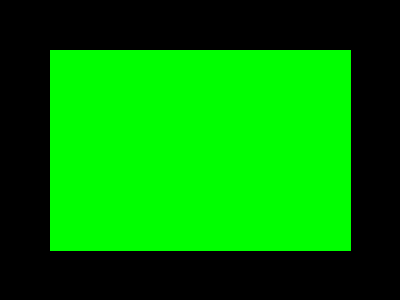

<class 'PIL.Image.Image'>
Tensor shape: torch.Size([3, 300, 400])


In [ ]:
from PIL import Image, ImageDraw
from IPython.display import display
import torchvision.transforms as transforms

# Create a new image with a black background
width, height = 400, 300
background_color = (0, 0, 0)
image = Image.new("RGB", (width, height), background_color)

# Create a draw object
draw = ImageDraw.Draw(image)

# Draw a red rectangle on the image
rectangle_color = (0, 255, 0)
rectangle_coordinates = [(50, 50), (350, 250)]
draw.rectangle(rectangle_coordinates, fill=rectangle_color)

# Display the image
display(image)
print(type(image))

# Define the transform to convert the image to a PyTorch tensor
transform = transforms.ToTensor()

# Apply the transform to convert the image to a PyTorch tensor
tensor_image = transform(image)

# Display the tensor shape
print("Tensor shape:", tensor_image.shape) #shape: #of channels, width, heigth

# 🐧 Converting a DataFrame to a PyTorch Tensor  

In this exercise, you will work with the **penguins** dataset, which is available in the `seaborn` library and can be found [here](https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv).  

## **Instructions**  
1. **Import the necessary libraries**: You will need `seaborn`, `pandas`, and `torch`.  
2. **Load the dataset**: Use `sns.load_dataset("penguins")` to load the dataset into a pandas DataFrame.  
3. **Print the data types of each column** before and after handling missing values.  
4. **Handle missing values**: Remove any rows that contain NaN values using `dropna()`.  
5. **Select numerical columns only**: Extract columns with numeric data types (`float64` and `int64`).  
6. **Convert the DataFrame to a PyTorch tensor**: Use `torch.tensor()` to transform the numerical data into a tensor with `dtype=torch.float32`.  
7. **Print the shape of the resulting tensor** to verify its dimensions.  



    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2     

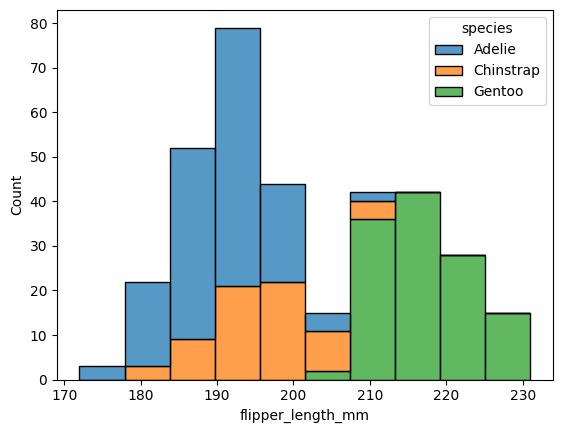

In [ ]:
import seaborn as sns
import torch
import pandas as pd

# Step 1-3: Load the dataset, print the dataset
df = sns.load_dataset("penguins")
sns.histplot(data=df, x="flipper_length_mm", hue="species", multiple="stack")

# Step 4: Drop missing values

# Step 5: Select numerical columns


# Step 6: Convert to PyTorch tensor


# Step 7: Print the shape


# Creating tensors without existing data

In [ ]:
first_tensor= torch.zeros(4,1)
print("first", first_tensor, first_tensor.dtype, first_tensor.shape)

second_tensor = torch.ones(2)  #return with 2 = number of rows and columns
print("second", second_tensor, second_tensor.dtype, second_tensor.shape)


third_tensor = torch.eye(3)  #return identity matrix with 3 = number of rows and columns
print("third", third_tensor, third_tensor.dtype, third_tensor.shape)


fourth_tensor = torch.rand(2,3)
print("fourth", fourth_tensor, fourth_tensor.dtype, fourth_tensor.shape)

first tensor([[0.],
        [0.],
        [0.],
        [0.]]) torch.float32 torch.Size([4, 1])
second tensor([1., 1.]) torch.float32 torch.Size([2])
third tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]) torch.float32 torch.Size([3, 3])
fourth tensor([[0.2502, 0.0203, 0.4245],
        [0.0035, 0.8579, 0.5552]]) torch.float32 torch.Size([2, 3])


# Task: look at the difference between torch.rand and torch.randn


1.  torch.rand: Generates random numbers from a uniform distribution between 0 and 1. This means the values will be evenly distributed between 0 and 1, with no bias towards any specific value in that range.

2.  torch.randn: Generates random numbers from a normal (Gaussian) distribution with a mean of 0 and a standard deviation of 1.




In [ ]:
# specify the dtype
new_tensor = torch.tensor(np.array([1,2,3]), dtype=torch.float64)
print(new_tensor, new_tensor.shape)

tensor([1., 2., 3.], dtype=torch.float64) torch.Size([3])


In [ ]:
#Change the dtype
# Example 1: Change dtype to float32
float32_tensor = new_tensor.to(torch.float32)
print("Float32 Tensor:", float32_tensor, float32_tensor.dtype)

# Example 2: Change dtype to int64
int64_tensor = new_tensor.to(torch.int64)
print("Int64 Tensor:", int64_tensor, int64_tensor.dtype)

# Example 3: Change dtype to int32
int32_tensor = new_tensor.to(torch.int32)
print("Int32 Tensor:", int32_tensor)

Float32 Tensor: tensor([1., 2., 3.]) torch.float32
Int64 Tensor: tensor([1, 2, 3]) torch.int64
Int32 Tensor: tensor([1, 2, 3], dtype=torch.int32)


# Test: Working with NumPy Arrays and PyTorch Tensors
Steps:


1.   Create a NumPy array: Start by creating a simple NumPy array.
2.   Create different PyTorch tensors: Use different methods to create PyTorch tensors from the NumPy array: torch.Tensor(), torch.tensor(), and torch.as_tensor()

3. Print the original array and the tensors: Display the NumPy array and the tensors created using the different methods.
4. Modify the original array: Change some values in the original NumPy array.
5. Print the modified array: Display the modified array and observe how it affects the tensors created earlier.






In [ ]:
# 1. Create a numpy array.
# 2. Create different PyTorch tensors from the array using different options (torch.Tensor,torch.tensor, torch.as_tensor).
# 3. Print the original array and the tensors.
# 4. Modify some values in the original array.
# 5. Print the modified array and observe how it affects the tensors.

#step 1
original_array = np.array([0,1,2,3,4])
#step 2

#step 3
#step 4

#step 5

orig: [0 1 2 3 4]
1: tensor([0, 1, 2, 3, 4])
2 tensor([0., 1., 2., 3., 4.])
3: tensor([0, 1, 2, 3, 4])
mod: [   0    1    0    3 1000]
1: tensor([0, 1, 2, 3, 4])
2 tensor([0., 1., 2., 3., 4.])
3: tensor([   0,    1,    0,    3, 1000])


# Tensor operations


1.   Reshaping tensors
2.   Squeezing and Un-squeezing of tensors
3.   Concatenating a tensors
4.   Flattening of tensors
5.   Arithmetic operations



In [ ]:
# 1. Reshaping tensors

# Step 1: Initialize a list with 20 elements
original_list = list(range(1, 21))

# Step 2: Transform the list into a PyTorch tensor
tensor_data = torch.tensor(original_list)

# Display the original list and the tensor
print("Original List:", original_list)
print("Tensor:", tensor_data)

# Reshaping Examples:
# Example 1: Reshape to a 4x5 matrix
reshaped_tensor_4x5 = tensor_data.reshape(4, 5)
print("\nReshaped Tensor (4x5):")
print(reshaped_tensor_4x5)

# Example 2: Reshape to a 2x10 matrix
reshaped_tensor_2x10 = tensor_data.view(2, 10)
print("\nReshaped Tensor (2x10):")
print(reshaped_tensor_2x10)


#check the size and the shape of the tensor
print("size, shape:", reshaped_tensor_4x5.size(), reshaped_tensor_4x5.shape)

#check the len of the list
print("len:", len(reshaped_tensor_4x5)) #it returns the number of rows

#find the number of elements
print("number of elements:",reshaped_tensor_4x5.numel())

Original List: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Tensor: tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20])

Reshaped Tensor (4x5):
tensor([[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10],
        [11, 12, 13, 14, 15],
        [16, 17, 18, 19, 20]])

Reshaped Tensor (2x10):
tensor([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
        [11, 12, 13, 14, 15, 16, 17, 18, 19, 20]])
size, shape: torch.Size([4, 5]) torch.Size([4, 5])
len: 4
number of elements: 20


In [ ]:
# 2. Squeezing and Un-squeezing of tensors
# Example 1: Squeeze operation (remove dimensions with size 1)
tensor_data_r = tensor_data.reshape(1,20)
squeezed_tensor = tensor_data_r.squeeze()

# Example 2: Unsqueeze operation (add a dimension with size 1)
unsqueezed_tensor = tensor_data_r.unsqueeze(0)  # Adds a dimension at position 0

# Display original, squeezed, and unsqueezed tensors
print("Original Tensor:")
print(tensor_data_r, tensor_data_r.shape)

print("\nSqueezed Tensor:")
print(squeezed_tensor, squeezed_tensor.shape)

print("\nUnsqueezed Tensor:")
print(unsqueezed_tensor, unsqueezed_tensor.shape)

Original Tensor:
tensor([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
         19, 20]]) torch.Size([1, 20])

Squeezed Tensor:
tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20]) torch.Size([20])

Unsqueezed Tensor:
tensor([[[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
          18, 19, 20]]]) torch.Size([1, 1, 20])


In [ ]:
# 3. Concatenating a tensors

tensor_1 = torch.tensor([
                         [0,1],
                         [2,3]])

tensor_2 = torch.tensor([
                         [4,5],
                         [6,7]])
# 1) row-wise concatenation
conc_tensor = torch.cat((tensor_1,tensor_2), dim=0) # along axis = 0
print("concatenated tensor:", conc_tensor, conc_tensor.size())

# 2) column-wise concatenation
conc_tensor_2 = torch.cat((tensor_1,tensor_2), dim=1) # along axis = 1
print("concatenated tensor:", conc_tensor_2, conc_tensor_2.size())

tensor_3 = torch.tensor([
                        [10,20,30]])
print("tensor_3:", tensor_3, tensor_3.size())
# to concatenate tensor_1 and tensor_3 the sizes of tensors must match (tensor_1: size 2x2, tensor_3: size 1x3)

concatenated tensor: tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7]]) torch.Size([4, 2])
concatenated tensor: tensor([[0, 1, 4, 5],
        [2, 3, 6, 7]]) torch.Size([2, 4])
tensor_3: tensor([[10, 20, 30]]) torch.Size([1, 3])


In [ ]:
# 4. Flattening of tensors
tensor_flatten = torch.flatten(tensor_1)
print("tensor_flatten:", tensor_flatten, tensor_flatten.size())

# try to concatenate tensor_1 and tensor_3
new_tensor_1 = torch.unsqueeze((tensor_flatten), dim=0)
print("new_tensor_1:", new_tensor_1, new_tensor_1.size())

conc_tensor_new = torch.cat((new_tensor_1,tensor_3), dim=1)
print("conc_tensor_new:", conc_tensor_new, conc_tensor_new.size())

# Transpose tensor_3
tensor_3_transposed = tensor_3.t()
print("tensor_3_transposed:", tensor_3_transposed, tensor_3_transposed.size())

tensor_flatten: tensor([0, 1, 2, 3]) torch.Size([4])
new_tensor_1: tensor([[0, 1, 2, 3]]) torch.Size([1, 4])
conc_tensor_new: tensor([[ 0,  1,  2,  3, 10, 20, 30]]) torch.Size([1, 7])
tensor_3_transposed: tensor([[10],
        [20],
        [30]]) torch.Size([3, 1])


In [ ]:
# 5. Arithmetic operation

# 1) sum
print("original tensors:", tensor_1, tensor_2)
sum_tensor = tensor_1 + tensor_2 # element-wise operations
print("sum:", sum_tensor)

# Note: element-wise operations can occur only on same size tensor and is scalar component

# 2) subtraction
sub_tensor = tensor_1 - tensor_2
print("subtration:", sub_tensor)

# 3) multiplication
mul_tensor= tensor_1*tensor_2
print("multiplication:", mul_tensor)

# 4) division
div_tensor = tensor_1 / tensor_2
print("division:", div_tensor)

original tensors: tensor([[0, 1],
        [2, 3]]) tensor([[4, 5],
        [6, 7]])
sum: tensor([[ 4,  6],
        [ 8, 10]])
subtration: tensor([[-4, -4],
        [-4, -4]])
multiplication: tensor([[ 0,  5],
        [12, 21]])
division: tensor([[0.0000, 0.2000],
        [0.3333, 0.4286]])


In [ ]:
# Question: how we can add 11 to the element in position row 1, column 2 of tensor_1?


Shape of tensor_1: torch.Size([2, 2])
tensor([[ 0, 12],
        [ 2,  3]])


**Comparision operations**: it is a type of element-wise comparision, where the result is given out as a boolean of either 0 (False) or 1 (True)


In [ ]:
t = torch.tensor([[10,20,30],
                  [40,50,60]])
print("t:", t, t.size())

equal_to = t.eq(10)
print("equal to:", equal_to)

greater_than_equal_to = t.ge(30)
print("greater than equal to:", greater_than_equal_to)

greater_than = t.gt(30)
print("greater than:", greater_than)

less_than_equal_to = t.le(20)
print("less than equal to:", less_than_equal_to)

less_than = t.lt(20)
print("less than:", less_than)

t: tensor([[10, 20, 30],
        [40, 50, 60]]) torch.Size([2, 3])
equal to: tensor([[ True, False, False],
        [False, False, False]])
greater than equal to: tensor([[False, False,  True],
        [ True,  True,  True]])
greater than: tensor([[False, False, False],
        [ True,  True,  True]])
less than equal to: tensor([[ True,  True, False],
        [False, False, False]])
less than: tensor([[ True, False, False],
        [False, False, False]])


Some useful functions:

In [ ]:
print("t:", t, t.size())

# absolute value
print("abs value:",t.abs())

# square root
print("square root:",t.sqrt())

# negation
print("negation:",t.neg())

# mean
# to calculate the mean, the tensor dtype must be either a floating point or complex dtype
# Convert the tensor to float32
t_float = t.float()

print("mean:", t_float.mean())

#std
print("std:", t_float.std())

# sum at certain columns/rows
print("sum row 0:", t[0].sum())
print("sum row 1:", t[1].sum())

print("sum each row", t.sum(dim=0))
print("sum each column", t.sum(dim=1))

# find the max value, min value
print("max:", t.max())
print("max value in row 1:", t[0].max())
print("min:", t.min())
print("min value in column 1:", t[:, 0].min())
print("index of the max value:", t.argmax()) #it flatten the tensor
print("index of the max value:", torch.argmax(t, dim=1).numpy()) #need to specify the dimension

t: tensor([[10, 20, 30],
        [40, 50, 60]]) torch.Size([2, 3])
abs value: tensor([[10, 20, 30],
        [40, 50, 60]])
square root: tensor([[3.1623, 4.4721, 5.4772],
        [6.3246, 7.0711, 7.7460]])
negation: tensor([[-10, -20, -30],
        [-40, -50, -60]])
mean: tensor(35.)
std: tensor(18.7083)
sum row 0: tensor(60)
sum row 1: tensor(150)
sum each row tensor([50, 70, 90])
sum each column tensor([ 60, 150])
max: tensor(60)
max value in row 1: tensor(30)
min: tensor(10)
min value in column 1: tensor(10)
index of the max value: tensor(5)
index of the max value: [2 2]


# Moving tensors to the GPU

PyTorch tensors also can be stored in a different kind of processor: a Graphics Processing Unit (GPU). Every PyTorch tensor can be transferred to (one of) the GPU(s) in order to perform massively parallel, fast computations. All operations that will be performed on the tensor will be carried out using the GPU-specific routines that come with PyTorch.

In [ ]:
import torch
import sys

#Create a tensor to GPU
tensor_gpu = torch.tensor([[1,2,3], [0.1,0.2,0.3]], device='cuda')

# Print the memory usage of the tensor 't'
print("Memory Allocated for 't':", sys.getsizeof(t) / (1024 ** 2), "MB")

# Move the tensor to GPU
if torch.cuda.is_available():

    gpu_tensor = t.to('cuda')
    # Alternatively, you can use gpu_tensor = t.cuda()

    # Print the tensors to verify the move
    print("CPU Tensor:", t)
    print("GPU Tensor:", gpu_tensor)

     # Check GPU memory usage
    print("GPU Memory Allocated:", torch.cuda.memory_allocated() / (1024 ** 2), "MB")
    print("GPU Max Memory Allocated:", torch.cuda.max_memory_allocated() / (1024 ** 2), "MB")

else:
    print("CUDA not available. Unable to move tensor to GPU.")

Memory Allocated for 't': 8.392333984375e-05 MB
CPU Tensor: tensor([[10, 20, 30],
        [40, 50, 60]])
GPU Tensor: tensor([[10, 20, 30],
        [40, 50, 60]], device='cuda:0')
GPU Memory Allocated: 11.44677734375 MB
GPU Max Memory Allocated: 11.44677734375 MB


In [ ]:
# Example 1: Operations on GPU

import time

# Create tensors on CPU
cpu_tensor1 = torch.randn(1000, 1000)
cpu_tensor2 = torch.randn(1000, 1000)

# Move tensors to GPU
gpu_tensor1 = cpu_tensor1.to('cuda')
gpu_tensor2 = cpu_tensor2.to('cuda')

# Measure time for element-wise addition on CPU
start_time = time.time()
result_cpu = cpu_tensor1 + cpu_tensor2
print("Time on CPU:", time.time() - start_time)

# Measure time for element-wise addition on GPU
start_time = time.time()
result_gpu = gpu_tensor1 + gpu_tensor2
print("Time on GPU:", time.time() - start_time)

Time on CPU: 0.002713918685913086
Time on GPU: 0.0012989044189453125


In [ ]:
# Example 2: Memory Management

# Create tensors on GPU
tensor1 = torch.randn(1000, 1000, device='cuda')
tensor2 = torch.randn(1000, 1000, device='cuda')

# Perform operations on GPU
result_tensor = tensor1 + tensor2

# Free GPU memory
torch.cuda.empty_cache()